In [9]:
import cartopy.crs as ccrs 
import cartopy.feature as cfeature
from cartopy.io.img_tiles import Stamen, GoogleTiles, MapboxTiles
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER

import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D as Line
from matplotlib.patheffects import Stroke
import matplotlib.ticker as mticker
import matplotlib.cm as cm
import numpy as np
import shapely.geometry as sgeom
from shapely.ops import transform as geom_transform
import pandas as pd
import sb_tools
import cmocean




In [3]:
#plt.rcParams["figure.figsize"] = (6,6)
plt.rcParams['font.size']= 20

mpl.rcParams['xtick.labelsize'] = 20
mpl.rcParams['ytick.labelsize'] = 20
mpl.rcParams['axes.labelsize'] = 20

In [60]:
NyA_wharf = [78.928883, 11.936524]


trawl_loc = np.zeros((3,2))
trawl_loc[0,:] = [78.617, 16.538]
trawl_loc[1,:] = [79.048, 11.345]
trawl_loc[2,:] = [79.037, 11.336]

probe_loc = np.zeros((2,2))
probe_loc[0,:] = [79.082, 11.405]
probe_loc[1,:] = [79.019, 11.207]


In [6]:
# Define the two coordinate systems with different ellipses.
# ----
wgs84  = ccrs.PlateCarree(globe=ccrs.Globe(ellipse='WGS84'))

# Define the coordinate system of the data we have from Natural Earth and
# acquire the 1:10m physical coastline shapefile.
geodetic = ccrs.Geodetic(globe=ccrs.Globe(datum='WGS84'))
#dataset = cfeature.NaturalEarthFeature(category='physical',
#                                       name='coastline',
#

In [ ]:
land_50m = cfeature.NaturalEarthFeature('physical', 'land', '10m',
                                    edgecolor='black',
                                    facecolor=cfeature.COLORS['land'])
ocean_50m = cfeature.NaturalEarthFeature('physical', 'ocean', '10m',
                                    edgecolor='face',
                                    facecolor=cfeature.COLORS['water'])

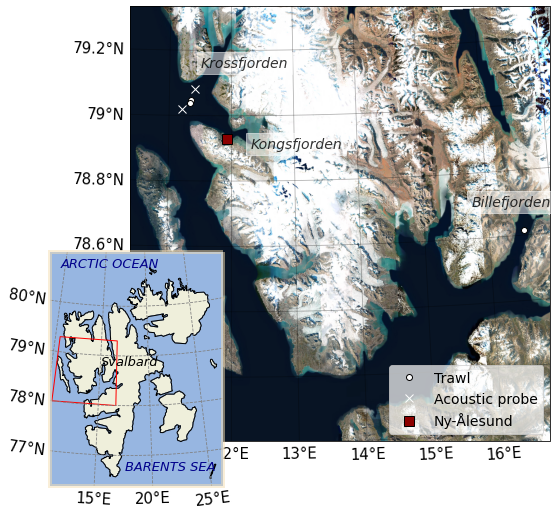

<Figure size 1080x720 with 0 Axes>

In [98]:
fig   = plt.figure(figsize=(8,8))
#ax    = plt.axes(projection = ccrs.PlateCarree())
proj = ccrs.Orthographic(central_longitude = 12, central_latitude = 79)
ax    = plt.axes(projection = proj)
# Pick the area of interest. In our case, roughly Tromsø
# -- Get hold of the coastlines for that area.
#extent=[15.80, 19.65, 68, 72.20]
extent=[10.5, 16.7, 78, 79.3]
ax.set_extent(extent, crs = ccrs.PlateCarree())


#geoms = list(dataset.intersecting_geometries(extent))

ax.set_ylabel('Latitude')

# Add the Stamen aerial imagery at zoom level 7.
#tiler = Stamen('terrain-background')
tiler = MapboxTiles('pk.eyJ1IjoibWJkdW5uIiwiYSI6ImNsZjE1cWhrcTA1OWczdW1jNmVoOWpvdjcifQ.qbX0aHozvxYGNW_fYuWwqA','satellite')
ax.add_image(tiler, 10)

gl = ax.gridlines(color='k', alpha=0.3, draw_labels = True)
gl.top_labels = False
gl.right_labels = False
#gl.ylocator = mticker.FixedLocator([78.8, 78.85, 78.9, 78.95, 79, 79.05])

# create map
#ax = plt.subplot(1,1,1,projection=proj)
#ax.gridlines(draw_labels=True)
#ax.set_extent(extent, crs=proj)

#ax.coastlines(resolution='10m')

# Plot Tucker trawls for sample
plt.plot(trawl_loc[:,1], trawl_loc[:,0],'w.', markersize=12, markeredgecolor='k', label='Trawl',transform=ccrs.PlateCarree())
plt.plot(probe_loc[:,1], probe_loc[:,0],'wx', markersize=8, label='Acoustic probe',transform=ccrs.PlateCarree())

# Wharf
plt.plot(NyA_wharf[1], NyA_wharf[0], 's', color='darkred', markeredgecolor='k', markersize=10, label='Ny-Ålesund', transform=ccrs.PlateCarree())
plt.legend(loc='lower right', fontsize=14, framealpha=0.7)

# Add fjords
t1 = plt.text(12.3, 78.9, 'Kongsfjorden', style='italic', transform=ccrs.PlateCarree(), fontsize=14, color = 'k', alpha=0.8)
t2 = plt.text(11.5, 79.15, 'Krossfjorden', style='italic', transform=ccrs.PlateCarree(), fontsize=14, color = 'k', alpha=0.8)
t3 = plt.text(15.75, 78.7, 'Billefjorden', style='italic', transform=ccrs.PlateCarree(), fontsize=14, color = 'k', alpha=0.8)

t1.set_bbox(dict(facecolor='white', alpha=0.5, edgecolor='white'))
t2.set_bbox(dict(facecolor='white', alpha=0.5, edgecolor='white'))
t3.set_bbox(dict(facecolor='white', alpha=0.5, edgecolor='white'))

# Add axes labels
#ax.text(-0.18, 0.55, 'Latitude', va='bottom', ha='center',
#        rotation='vertical', rotation_mode='anchor',
#        transform=ax.transAxes, fontsize=15)
#ax.text(0.55, -0.09, 'Longitude', va='bottom', ha='center',
#        rotation='horizontal', rotation_mode='anchor',
#        transform=ax.transAxes, fontsize=15)
ax.tick_params(labelsize=12)

ax.set_rasterized(True)

## ---------------------------
# Create an inset GeoAxes showing the location.
#sub_ax = fig.add_axes([0.1, 0.05, 0.3, 0.3],

sub_proj = ccrs.Orthographic(central_longitude = 18, central_latitude = 76)
sub_ax = fig.add_axes([0.01, 0.0, 0.30, 0.5],
                    projection = sub_proj)
sub_ax.set_extent([11.3, 26, 76.3, 81])


fig = plt.figure(figsize=(15,10))

# Make a nice border around the inset axes.
effect = Stroke(linewidth=4, foreground='wheat', alpha=0.5)
sub_ax.spines['geo'].set_path_effects([effect])

# Add the land, coastlines and the extent of domain.
sub_ax.add_feature(land_50m)
sub_ax.add_feature(ocean_50m)
sub_ax.coastlines(resolution='10m')
sub_ax.add_feature(cfeature.BORDERS)

sub_ax.text(15.1, 78.81, 'Svalbard', transform=ccrs.PlateCarree(), fontsize=13, style='italic', color = 'k')
sub_ax.text(9.5, 80.7, 'ARCTIC OCEAN', transform=ccrs.PlateCarree(), fontsize=13, style='italic', color = 'darkblue')
sub_ax.text(17.6, 76.7, 'BARENTS SEA', transform=ccrs.PlateCarree(), fontsize=13, style='italic', color = 'darkblue')

extent_box = sgeom.box(extent[0], extent[2], extent[1], extent[3])
sub_ax.add_geometries([extent_box], ccrs.PlateCarree(), facecolor='none',
                      edgecolor='red', linewidth=1)
gl_sub = sub_ax.gridlines(color='grey', draw_labels=True, x_inline=False, linestyle='--')
gl_sub.top_labels  = False
gl_sub.left_labels = True
gl_sub.right_labels = False

gl_sub.xlocator = mticker.FixedLocator([10,15,20,25])
gl_sub.ylocator = mticker.FixedLocator([77,78,79,80])


fig.savefig('C:/Users/mbd/OneDrive - Akvaplan-niva AS/PhD-APN/ChaptersandExperiments/AFKABAN/map.jpeg', format='jpeg', dpi = 300, facecolor='w', bbox_inches='tight')

## Poster version

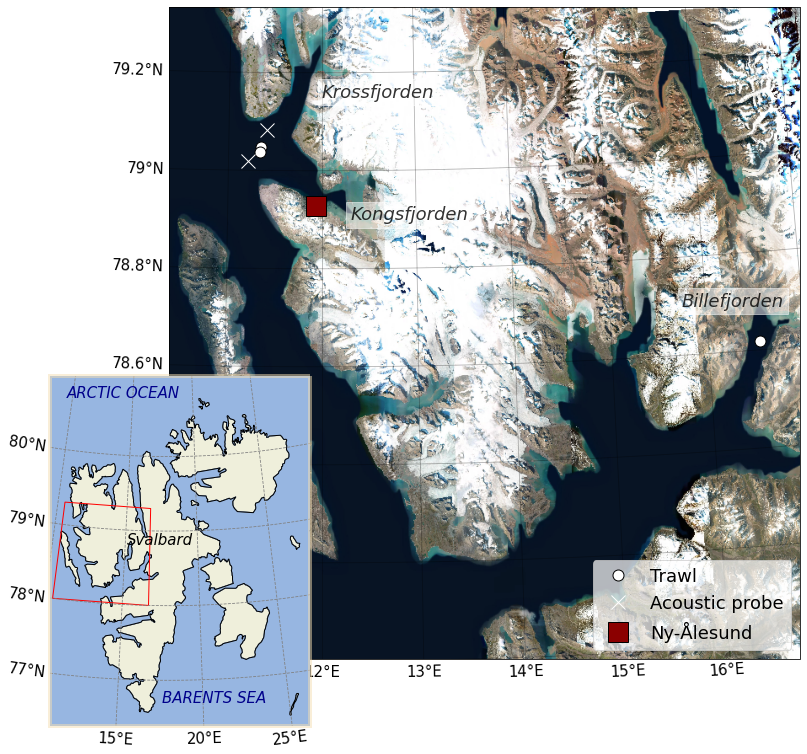

In [104]:
fig   = plt.figure(figsize=(12,12))
#ax    = plt.axes(projection = ccrs.PlateCarree())
proj = ccrs.Orthographic(central_longitude = 12, central_latitude = 79)
ax    = plt.axes(projection = proj)
# Pick the area of interest. In our case, roughly Tromsø
# -- Get hold of the coastlines for that area.
#extent=[15.80, 19.65, 68, 72.20]
extent=[10.5, 16.7, 78, 79.3]
ax.set_extent(extent, crs = ccrs.PlateCarree())


#geoms = list(dataset.intersecting_geometries(extent))

ax.set_ylabel('Latitude')

# Add the Stamen aerial imagery at zoom level 7.
#tiler = Stamen('terrain-background')
tiler = MapboxTiles('pk.eyJ1IjoibWJkdW5uIiwiYSI6ImNsZjE1cWhrcTA1OWczdW1jNmVoOWpvdjcifQ.qbX0aHozvxYGNW_fYuWwqA','satellite')
ax.add_image(tiler, 10)

gl = ax.gridlines(color='k', alpha=0.3, draw_labels = True)
gl.top_labels = False
gl.right_labels = False
#gl.ylocator = mticker.FixedLocator([78.8, 78.85, 78.9, 78.95, 79, 79.05])

# create map
#ax = plt.subplot(1,1,1,projection=proj)
#ax.gridlines(draw_labels=True)
#ax.set_extent(extent, crs=proj)

#ax.coastlines(resolution='10m')

# Plot Tucker trawls for sample
plt.plot(trawl_loc[:,1], trawl_loc[:,0],'w.', markersize=22, markeredgecolor='k', label='Trawl',transform=ccrs.PlateCarree())
plt.plot(probe_loc[:,1], probe_loc[:,0],'wx', markersize=14, label='Acoustic probe',transform=ccrs.PlateCarree())

# Wharf
plt.plot(NyA_wharf[1], NyA_wharf[0], 's', color='darkred', markeredgecolor='k', markersize=20, label='Ny-Ålesund', transform=ccrs.PlateCarree())
plt.legend(loc='lower right', fontsize=18, framealpha=0.7)

# Add fjords
t1 = plt.text(12.3, 78.9, 'Kongsfjorden', style='italic', transform=ccrs.PlateCarree(), fontsize=18, color = 'k', alpha=0.8)
t2 = plt.text(12, 79.15, 'Krossfjorden', style='italic', transform=ccrs.PlateCarree(), fontsize=18, color = 'k', alpha=0.8)
t3 = plt.text(15.75, 78.7, 'Billefjorden', style='italic', transform=ccrs.PlateCarree(), fontsize=18, color = 'k', alpha=0.8)

t1.set_bbox(dict(facecolor='white', alpha=0.5, edgecolor='white'))
t2.set_bbox(dict(facecolor='white', alpha=0.5, edgecolor='white'))
t3.set_bbox(dict(facecolor='white', alpha=0.5, edgecolor='white'))

# Add axes labels
#ax.text(-0.18, 0.55, 'Latitude', va='bottom', ha='center',
#        rotation='vertical', rotation_mode='anchor',
#        transform=ax.transAxes, fontsize=15)
#ax.text(0.55, -0.09, 'Longitude', va='bottom', ha='center',
#        rotation='horizontal', rotation_mode='anchor',
#        transform=ax.transAxes, fontsize=15)
ax.tick_params(labelsize=12)

ax.set_rasterized(True)

## ---------------------------
# Create an inset GeoAxes showing the location.
#sub_ax = fig.add_axes([0.1, 0.05, 0.3, 0.3],

sub_proj = ccrs.Orthographic(central_longitude = 18, central_latitude = 76)
sub_ax = fig.add_axes([0.01, 0.0, 0.30, 0.5],
                    projection = sub_proj)
sub_ax.set_extent([11.3, 26, 76.3, 81])


#fig = plt.figure(figsize=(15,10))

# Make a nice border around the inset axes.
effect = Stroke(linewidth=4, foreground='wheat', alpha=0.5)
sub_ax.spines['geo'].set_path_effects([effect])

# Add the land, coastlines and the extent of domain.
sub_ax.add_feature(land_50m)
sub_ax.add_feature(ocean_50m)
sub_ax.coastlines(resolution='10m')
sub_ax.add_feature(cfeature.BORDERS)

sub_ax.text(15.1, 78.81, 'Svalbard', transform=ccrs.PlateCarree(), fontsize=15, style='italic', color = 'k')
sub_ax.text(9.5, 80.7, 'ARCTIC OCEAN', transform=ccrs.PlateCarree(), fontsize=15, style='italic', color = 'darkblue')
sub_ax.text(17.6, 76.7, 'BARENTS SEA', transform=ccrs.PlateCarree(), fontsize=15, style='italic', color = 'darkblue')

extent_box = sgeom.box(extent[0], extent[2], extent[1], extent[3])
sub_ax.add_geometries([extent_box], ccrs.PlateCarree(), facecolor='none',
                      edgecolor='red', linewidth=1)
gl_sub = sub_ax.gridlines(color='grey', draw_labels=True, x_inline=False, linestyle='--')
gl_sub.top_labels  = False
gl_sub.left_labels = True
gl_sub.right_labels = False

gl_sub.xlocator = mticker.FixedLocator([10,15,20,25])
gl_sub.ylocator = mticker.FixedLocator([77,78,79,80])


fig.savefig('C:/Users/mbd/OneDrive - Akvaplan-niva AS/PhD-APN/PhDdocs/ConferencesMeetings/WGFAST2023/map_poster.jpeg', format='jpeg', dpi = 300, facecolor='w', bbox_inches='tight')